# SPRINT 8 - TASCA 1:

## Nivel 1
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

* Conectaremos la DB de MySQL y luego crearemos un diccionario para almacenar los DataFrames

In [2]:
# Primero, instalamos las bibliotecas que utilizaremos en la terminal con pip install
# Instaladas las librerías necesarias, las importamos 
import pandas as pd
from sqlalchemy import create_engine

# Conectamos a la base de datos
host ='localhost'
database='transactionsT4'
user='root'
password='4443'

# Creamos una cadena de conexión
cadena_conexion = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Creamos el motor de conexión
motor = create_engine(cadena_conexion)

# Creamos una lista de las tablas a cargar
nombres_tablas = ['transactions', 'credit_cards', 'companies', 'products_per_transactions', 'products', 'users_all']

# Creamos un diccionario para almacenar los DataFrames
df = {}

# Con un bucle for leemos cada tabla en un DataFrame y lo almacenamos en el diccionario
for nombre in nombres_tablas:
    query = f'SELECT * FROM {nombre}'
    df[nombre] = pd.read_sql(query, con=motor)

# Para verificar la carga correcta, accedemos a las primeras 5 filas del DataFrame de la tabla Transactions almacenado en el diccionario
df_transactions = df['transactions']
df_transactions.head()


,id,card_id,business_id,fecha_hora,amount,declined,products_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:00,466.92,0,"71, 1, 19",92,819.184.589.824,-125.275.561.984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:00,49.53,0,"47, 97, 43",170,-439.694.885.888,-1.175.251.835.904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:00,92.61,0,"47, 67, 31, 5",275,-81.222.680.576,-129.049.879.552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:00,394.18,0,"89, 83, 79",265,-343.593.055.232,-100.555.928.064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:00,279.93,0,"43, 31",92,337.381.445.632,158.298.210.304


* Verificamos la carga de todos los DataFrames

In [3]:
for nombre, dfs in df.items():
    print(f'\nVerificación del DataFrame de la tabla: {nombre}')
        
    # Mostramos las primeras filas con head()
    print(f'Primeras filas de {nombre}:\n', dfs.head(), '\n')
        
    # Comprobamos la forma (shape)
    print(f'Shape de {nombre}:', dfs.shape, '\n')
        
    # Mostramos el esquema info()
    print(f'Info de {nombre}:')
    dfs.info()
    print('\n')
        
    # Resumen estadístico con describe()
    print(f'Descripción de {nombre}:\n', dfs.describe(), '\n')



Verificación del DataFrame de la tabla: transactions
Primeras filas de transactions:
                                      id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3  0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4  06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   

           fecha_hora  amount  declined   products_ids  user_id  \
0 2021-08-28 23:42:00  466.92         0      71, 1, 19       92   
1 2021-07-26 07:29:00   49.53         0     47, 97, 43      170   
2 2022-01-06 21:25:00   92.61         0  47, 67, 31, 5      275   
3 2022-01-26 02:07:00  394.18         0     89, 83, 79      265   
4 2021-10-26 23:00:00  279.93         0         43, 31       92   

                lat           longitude  
0   819.184.589.824    -125.275.561.984  
1  -439.694.885.888  -1.175.251.835

## Ejercicio 1: Una variable numérica

Graficamos el campo id_products de la tabla products_per_transactions.
Seleccionamos un histograma de frecuencia para poder ver el id de los productos más vendidos, escogemos que sea un histograma de lineas porque son muchos datos (100 productos).

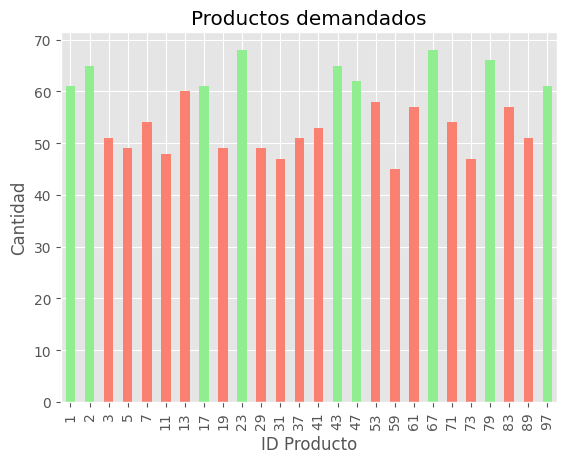

In [4]:
# Importamos librerías
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot') #damos formato de estilo al gráfico

# Obtenemos los datos de los campos 'id_product' de la tabla 'product_per_transactions'
id_product = df['products_per_transactions']['id_product']

# Contamos las ocurrencias de cada id_product y las ordenamos para que estén ascendentes
product_counts = id_product.value_counts().sort_index()

# Creamos una variable para darle color sólo para los id de producto que se hayan vendido más de 60 unidades
color = ['lightgreen' if count > 60 else 'salmon'for count in product_counts]

# Creamos el gráfico de líneas
product_counts.plot(kind='bar', color = color)

# Añadimos etiquetas y título
plt.xlabel('ID Producto')  # Etiqueta para el eje x
plt.ylabel('Cantidad')   # Etiqueta para el eje y
plt.title('Productos demandados')

# Mostramos el gráfico
plt.show()

**Interpretación:**
*En este gráfico podemos observar que los productos más vendidos que superan las 60 unidades (coloreados en verde) son los de ID: 1, 2, 17, 23, 43, 47, 67, 79 y 97.
En base a estos datos podría recomendarse, por ejemplo, fabricar más de los productos más demandados y discontinuar o promocionar los menos demandados.*

## Ejercicio 2: dos variables numéricas

Seleccionamos las variables precio y peso, para ver si existe alguna relación entre ellas. Realizaremos un gráfico de dispersión.

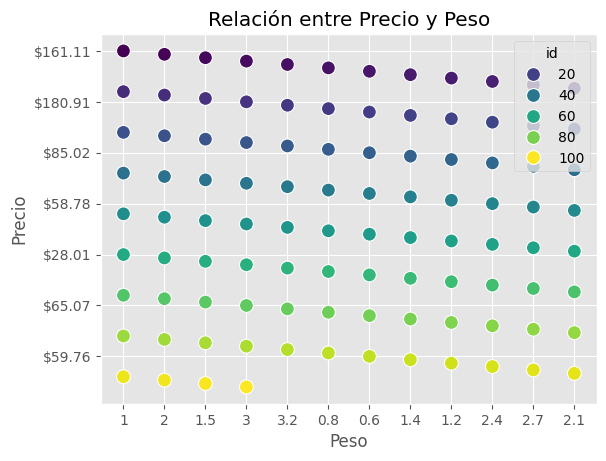

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Obtenemos los datos de los campos 'precio'y 'peso' de la tabla 'products'
# Al graficar y ver que no había una relación lineal añadimos la variable id de producto a los colores para ver si esto ayudaba a explicar la relación.
precio = df['products']['price']
peso = df['products']['weight']
id_p = df['products']['id']

# Creamos el gráfico de dispersión con Seaborn
sns.scatterplot(x=peso, y=precio, hue=id_p, palette='viridis', s=100)

# Añadimos etiquetas y título
plt.xlabel('Peso')       # Etiqueta para el eje x
plt.ylabel('Precio')     # Etiqueta para el eje y
plt.title('Relación entre Precio y Peso')

# Controlamos la densidad de las etiquetas del eje y para mejorar la legibilidad
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

# Mostramos el gráfico
plt.show()

**Interpretación:**
*Este gráfico muestra la relación entre el precio y el peso de los productos, con los puntos coloreados según el ID del producto. 
Del gráfico podemos inferir que hay 12 categorías de peso diferentes entre los productos. Pero que no hay una relación lineal entre peso y precio, ya que los puntos no siguen una tendencia ascendente o descendente obvia. También podemos observar que los precios oscilan entre aproximadamente $28 y $180, mientras que los pesos varían entre aproximadamente 0.6 y 3.2. 
Los productos con diferentes ID están dispersos por todo el rango del gráfico, lo que sugiere que el ID no está correlacionado con una combinación específica de peso y precio. La falta de una relación clara entre el peso y el precio podría indicar que otros factores no representados en este gráfico (como la calidad del material, la marca, las características adicionales, etc.) están influyendo en el precio de los productos.*

El gráfico anterior muestra los datos ordenados tal como están en las base de datos, por eso los valores de los ejes no están ordenados de menor a mayor y la visualización puede dar la impresión errónea de que existe una relación entre las variables.
A continuación, probamos visualizar lo mismo pero con el gráfico plot de Matplotlib, ordenando primero los valores de la variables de manor a mayor.

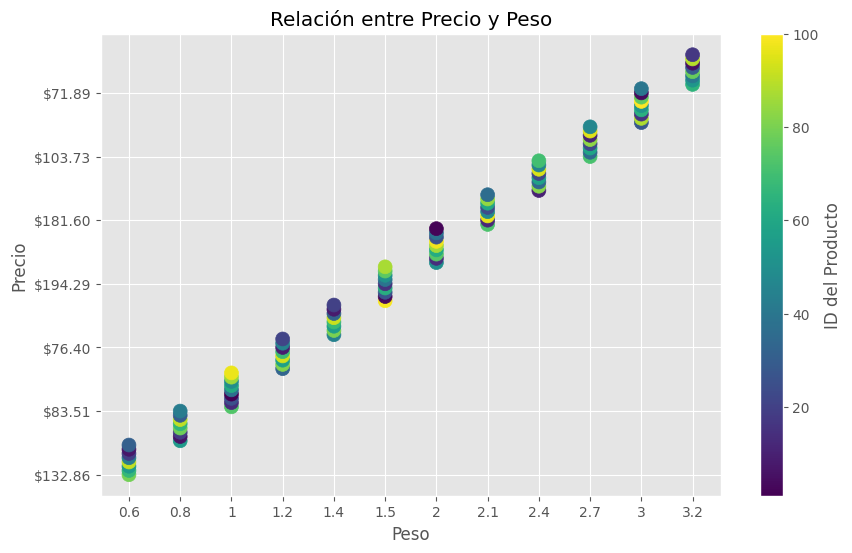

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Utilizamos las mismas variables del gráfico anterior (precio, peso e id_p)
# Creamos un DataFrame temporal con los datos
data = pd.DataFrame({'precio': precio, 'peso': peso, 'id_p': id_p})

# Ordenamos los datos por 'peso' y luego por 'precio'
data = data.sort_values(by=['peso', 'precio'])

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['peso'], data['precio'], c=data['id_p'], cmap='viridis', s=100)

# Añadimos etiquetas y título
plt.xlabel('Peso')       # Etiqueta para el eje x
plt.ylabel('Precio')     # Etiqueta para el eje y
plt.title('Relación entre Precio y Peso')

# Añadimos una barra de colores
plt.colorbar(scatter, label='ID del Producto')

# Controlamos la densidad de las etiquetas del eje y para mejorar la legibilidad
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

# Mostramos el gráfico
plt.show()

**Interpretación:** *La interpretación sería la misma que la del gráfico anterior, sólo que aquí está visualmente más claro que no hay una relación clara entre precio, peso y Id de producto. Ya que los productos se distribuyen entre todos los precios y pesos.*

## Ejercicio 3: Una variable categòrica.

Escogemos hacer un gráfico de la variable country. Como son poco valores haremos un gráfico de barras y como es una variable categórica utilizaremos la librería seaborn ya que tiene la función countplot que es específica para contar la frecuencia de cada categoría.

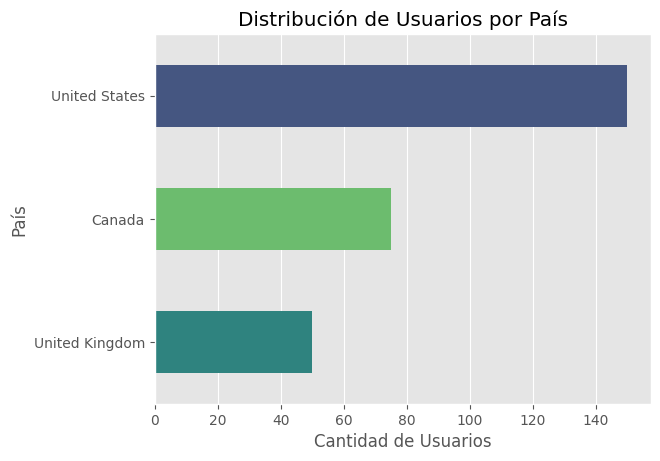

In [7]:
# Importamos las librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenemos los datos de los países
paises = df['users_all']['country']

# Creamos el gráfico de conteo, ordenando las barras según frecuencia de mayor a menor
sns.countplot(y=paises, order=paises.value_counts().index, palette='viridis', width=0.5, hue=paises)

# Añadimos etiquetas y título
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('País')
plt.title('Distribución de Usuarios por País')

# Mostramos el gráfico
plt.show()

**Interpretación:** *En este gráfico de barras podemos ver la cantidad de usuarios según países ordenados de mayor a menor. Estados Unidos es el país que cuenta con mayor cantidad de clientes, superando los 140. Le sigue Canadá con más de 60 clientes y luego Reino Unido con poco más de 40 clientes. Basándonos en este gráfico podríamos recomendar aumentar la presencia y/o realizar promociones o campañas de marketing en Reino Unido para mejorar su participación en las transacciones.*

## Ejercicio 4: Una variable categórica y una numérica.

Escojemos las variables amount(transactions) y country(companies), para ver la suma de transacciones que hay por país.
Para visualizar la participación de cada país haremos un gráfico de pastel.

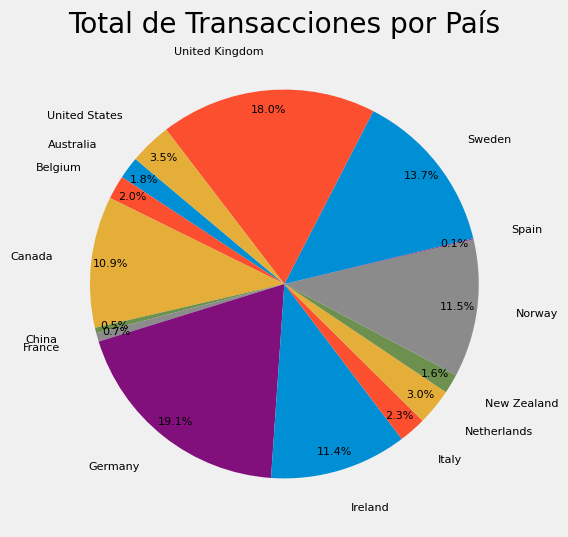

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("fivethirtyeight")  #damos formato de estilo al gráfico

transactions = df['transactions']
companies =df['companies']

# Unimos las tablas 'transactions' y 'companies' por los campos 'business_id' y 'company_id'
datos = pd.merge(transactions, companies, how='inner', left_on='business_id', right_on='company_id')

# Agrupamos los datos por país y calculamos la suma de las transacciones para cada país
transacciones_por_pais = datos.groupby('country')['amount'].sum()

# Creamos el gráfico de pastel
plt.figure(figsize=(6, 6))  # Ajustamos el tamaño de la figura 
plt.pie(transacciones_por_pais, 
        labels=transacciones_por_pais.index, #etiquetas según el índice de la variable transacciones_por_pais (sería país)
        autopct='%1.1f%%',  #formato del número, float, con un decimal y símbolo de porcentaje
        startangle=140,     #ángulo donde comienza a dibujarse el pastel
        textprops={'fontsize': 8},    #tamaño del texto
        pctdistance=0.9,                #distancia de los porcentajes
        labeldistance=1.2)              #distancia de las etiquetas

# Añadimos título
plt.title('Total de Transacciones por País')

# Mostramos el gráfico
plt.show()

**Interpretación**: *Con este gráfico podemos ver que los 3 países que realizan transacciones por mayor importe son Alemania(19,1%), Reino Unido(18%) y Suecia(13.7%). Mientras que los que realizan menos transacciones por importe total son España(0.1%), China(0,5%) y Francia(0,7%). Dependiendo de la estrategia comercial de la empresa, se podría recomendar cerrar estos puntos de venta o por el contrario, aumentar las campañas de marketing en estos países si se quiere seguir apostando por ganar cuota de mercado a largo plazo.* 

## Ejercicio 5: Dos variables categóricas

Visualizaremos las variables países de las compañías y transacciones declinadas, en un gráfico de barras apiladas para poder ver la cantidad de transacciones rechazadas y aceptadas por país.

<Figure size 1000x800 with 0 Axes>

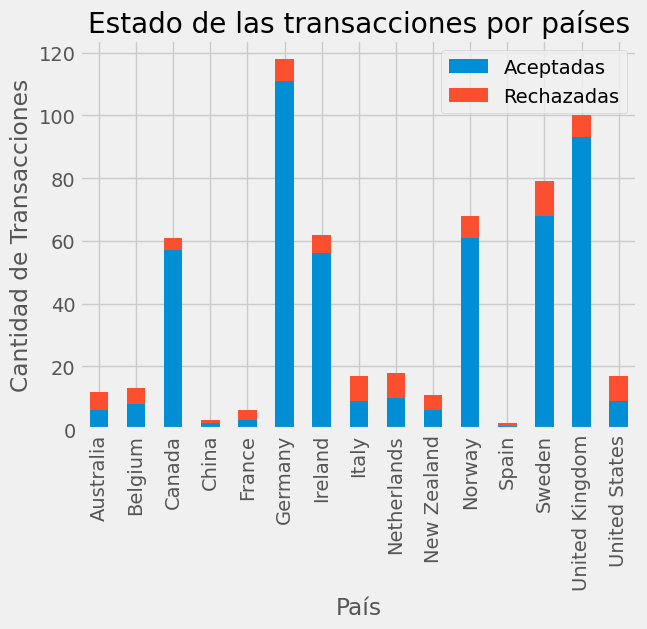

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 

companies = df['companies']
transactions = df['transactions']

# Unimos las tablas 'transactions' y 'companies' por los campos 'business_id' y 'company_id'
datos = pd.merge(transactions, companies, how='inner', left_on='business_id', right_on='company_id')

# Agrupamos los datos por país y contamos las transacciones declinadas 
# Con unstack() pivotamos el índice interno del dataframe resultante para generar columnas con los valores únicos de 'declined'
agrupados = datos.groupby('country')['declined'].value_counts().unstack()

# Renombramos las columnas para que en el gráfico, en lugar de 1 y 0, diga Aceptadas y Rechazadas con el atributo .columns 
agrupados.columns = ['Aceptadas', 'Rechazadas']

# Graficamos 
plt.figure(figsize=(10, 8))  # Ajustamos el tamaño de la figura 
agrupados.plot(kind='bar', stacked=True) #con stacked=True hacemos que las columnas sean apiladas

#Colocamos título y etiquetas a los ejes
plt.title('Estado de las transacciones por países')
plt.xlabel('País')
plt.ylabel('Cantidad de Transacciones')

plt.show()

**Interpretación:** *Con este gráfico de columnas apiladas podemos visualizar la cantidad de transacciones realizadas por cada país y también ver cuantas de ellas han sido rechazadas (en naranja) y cuantas aceptadas (en celeste). Vemos que Alemania y Reino Unido son los países con más transacciones realizadas, pero no necesariamente los que tienen más proporción de rechazos. Australia, Francia, Italia, Países Bajos, Nueva Zelanda, España y EEUU son los que tienen mayor porcentaje de transacciones rechazadas sobre el total. Podría recomendarse indagar más sobre las causas de estos rechazos para mejorar el porcentaje de transacciones exitosas.* 

## Ejercicio 6: Tres Variables
Escojemos las variables amount de transacciones, edad y país del usuario. Haremos un gráfico de columnas, agrupando por grupos de edades y por países la cantidad de transacciones.

C:\Users\mica_\AppData\Local\Temp\ipykernel_14072\73936314.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = datos.groupby(['country', 'age_group']).size().unstack(fill_value=0) #size() cuenta la cantidad de filas por grupo en el df


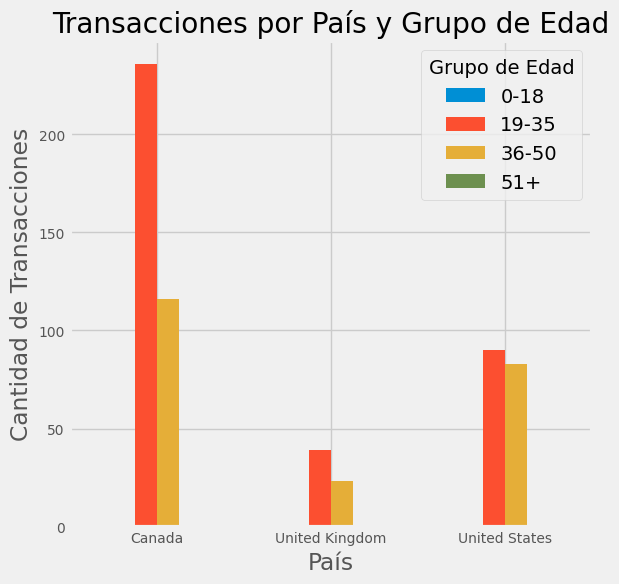

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos los DataFrames users_all y transactions
users_all = df['users_all']
transactions = df['transactions']

# Unimos los DataFrames por id y user_id
datos = pd.merge(transactions, users_all, left_on='user_id', right_on='id')

# Convertimos birth_date a datetime y calculamos la edad
datos['birth_date'] = pd.to_datetime(datos['birth_date']) 
datos['age'] = (pd.Timestamp.now() - datos['birth_date']).dt.days // 365  #// es una división entera que redondea al número entero hacia abajo 

# Creamos grupos de edad
bins = [0, 19, 36, 51, np.inf] #np.inf es como si fuera un límite infinito
labels = ['0-18', '19-35', '36-50', '51+']
datos['age_group'] = pd.cut(datos['age'], bins=bins, labels=labels, right=False) #right=False indica intervalos semi-abiertos en el extremo derecho ej: [19, 36) 

# Agrupamos los datos por país y por grupo de edad y contamos las transacciones
grouped = datos.groupby(['country', 'age_group']).size().unstack(fill_value=0) #size() cuenta la cantidad de filas por grupo en el df

# Creamos el gráfico de barras agrupadas, damos formato a tamaño y texto
grouped.plot(kind='bar', stacked=False, figsize=(6, 6), rot=0, fontsize=10)

# Colocamos título y etiquetas a los ejes
plt.title('Transacciones por País y Grupo de Edad')
plt.xlabel('País')
plt.ylabel('Cantidad de Transacciones')
plt.legend(title='Grupo de Edad')

# Mostramos el gráfico
plt.show()


**Interpretación:** *Con este gráfico podemos ver que los clientes tienen entre 19 y 50 años, ya que no hay clientes de los otros dos grupos etarios (menores de 19 ni mayores de 51). En Canadá, que es donde se realizan la mayor cantidad de transacciones, el público cliente es más joven (19-35), al igual que en el Reino Unido. Mientras que en EEUU el público tiene  más edad (36-50). Sería interesante profundizar en analizar qué productos prefiere cada uno de los pùblicos para afinar la estrategia de marketing en cada país.También se podría pensar en hacer un estudio de mercado para investigar que otro producto podríamos ofrecer que sea de interés para el público +51. Otra opción, sería hacer campañas de marketing promocionando los productos disponibles, pero direccionadas a un público más senior (+51), todo esto si una estrategia a largo plazo fuese ganar clientes en esta franja etaria. Además, teniendo en cuenta que el canal de difusión que consume cada público es diferente sería más recomendable realizar campañas de marketing por medio de redes sociales en Canadá y el Reino Unido enfocadas al público joven, mientras que en EEUU probablemente sea más eficiente una campaña por correo electrónico, periódicos digitales o TV.*

## Ejercicio 7: Graficar un Pairplot.
Pairplot es una función de la biblioteca Seaborn que sirve para trazar relaciones entre pares de variables numéricas en un conjunto de datos. 
Genera una cuadrícula de gráficos de dispersión para cada par de variables, lo que permite visualizar rápidamente las relaciones entre ellas.
Como está diseñada para trabajar principalmente con variables numéricas, escojemos las tablas Transactions y Companies del Dataframe y Pairplot seleccionará automáticamente sólo las variables que considera numéricas, descartando las categóricas.

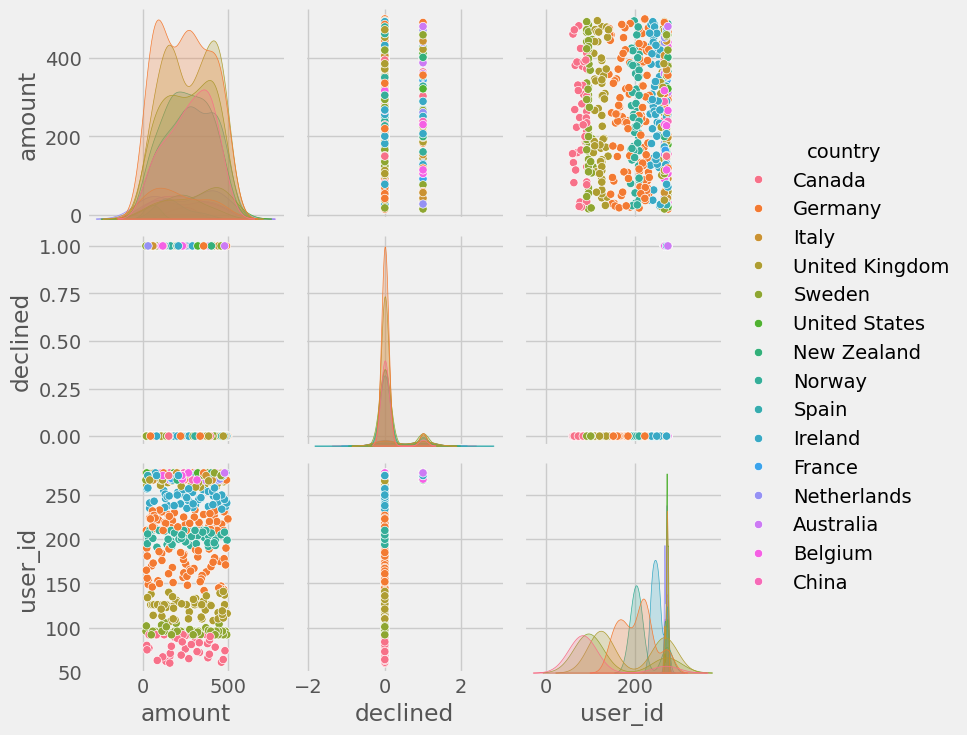

In [11]:
import seaborn as sns
import pandas as pd

# Obtenemos los DataFrames
transactions = df['transactions']
companies = df['companies']

# Unimos los DataFrames 
datos = pd.merge(transactions, companies, left_on='business_id', right_on='company_id')

# Graficamos
sns.pairplot(data=datos, hue="country") #diferenciamos los países por color para poder tener otro nivel de análisis

**Interpretación:** *Las variables numéricas analizadas son amount, declined y user_id. Los colores representan los países de cada compañía. 
Comenzaremos analizando los gráficos de arriba a abajo, de izquierda a derecha.
El **primer gráfico** muestra la distribución de la variable amount, vemos que sus valores se encuentran entre 0 y 500. El **segundo gráfico y el cuarto** muestran la relación entre amount y declined, se ve claramente que declined admite sólo dos valores 0 y 1, ya que es un booleano. Esto mismo se visualiza claramente en el **gráfico cinco**, que muestra la distribución de declined, donde se ve una distribución concentrada en sólo dos valores, uno con mayor frecuencia que el otro (el 0=FALSE, ya que la mayoría de trasacciones han sido aceptadas).
El **tercer y septimo gráfico** muestran la relación entre amount y user_id, podemos ver que los datos están bastante disperso lo que indicaría que no hay una tendencia clara, es decir que la cantidad no parece estar relacionada con el id de usuario. Por los colores podemos deducir que el id de usuario se ha asignado en función del país del cliente siguiendo un orden, por ejemplo vemos que las empresas de ubicadas en Canadá tienen los Id de usuario más pequeños, luego siguen Suecia, Reino Unido y así sucesivamente. 
En el **sexto y octavo gráfico** encontramos la relación entre declined y user_id, donde vemos que sólo los usuarios con id más alto son los que han tenido transacciones declinadas. Esto podría indicar algún sesgo en los datos o algún problema por ejemplo con las ventas realizadas en estos países, ya que justo son los últimos clientes registrados los únicos que han tenido transacciones declinadas. Valdría la pena ingdagar un poco más en esta cuestión.
Por último, en el **noveno gráfico** vemos la distribución de la variable user_id que adopta los valores aproximadamente desde 50 hasta 300.

# Nivel 2
## Ejercicio 1: Correlación de todas las variables numéricas
Analizaremos la correlación de todas las variables numéricas que consideramos relevantes (amount, user_id, id_product, declined, price y weight).
Para esto utilizaremos una matriz de correlación y la visualización Heatmap (mapa de calor) de Seaborn. 


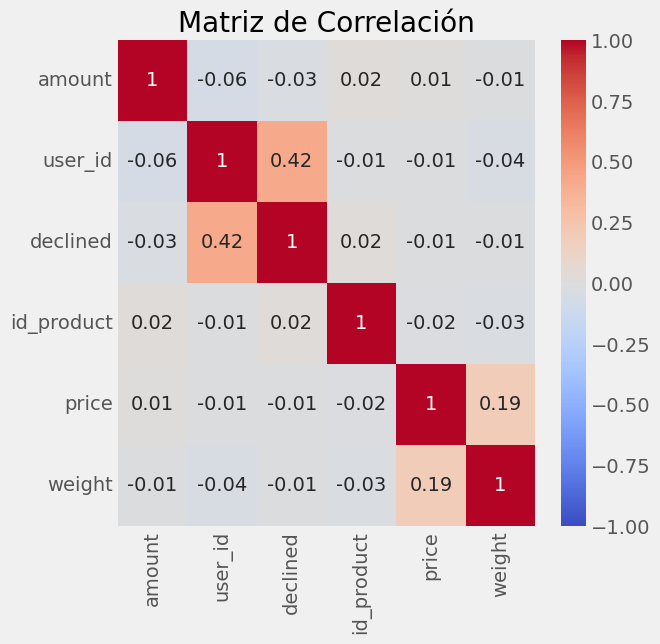

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Seleccionamos los DataFrames necesarios
products = df['products']
ppt = df['products_per_transactions']
transactions = df['transactions']

# Unimos los DataFrames
products_ppt = pd.merge(products, ppt, left_on='id', right_on='id_product')
merged = pd.merge(products_ppt, transactions, left_on='id_transaction', right_on='id')

# Como queremos visualizar 'precio' la transaformamos quitando el signo $ para que sea una variable numérica
merged['price'] = merged['price'].replace(r'[\$]', '', regex=True).astype(float)

# Seleccionamos los campos que queremos analizar
seleccion = merged[['amount', 'user_id','declined', 'id_product', 'price', 'weight']]

# Primero calculamos la matriz de correlación, redondeamos a 2 decimales
matriz_correlacion = seleccion.corr().round(2)

"""
# Imprimimos la matriz de correlación porque tenemos algún error en el código, lo corregimos
print('Matriz de correlación:')
print(matriz_correlacion)
"""

# Configuramos el tamaño del gráfico
plt.figure(figsize=(6, 6))

# Creamos el heatmap
sns.heatmap(matriz_correlacion,
            annot=True,      #annot=true añade los valores a los recuadros
            cmap='coolwarm', # con esto le damos el estilo de colores
            vmin=-1, vmax=1) # establecemos valores máximos y mínimos para que coincida con el coeficiente de correlación

# Mostramos el gráfico
plt.title('Matriz de Correlación')
plt.show()

**Interpretación:** *La matriz de correlación sirve para ver las relaciones que se establecen entre dos variables, la diagonal siempre dará 1 ya que es la relación de cada variable con sigo misma. Utilizamos esta matriz para graficar el mapa de calor, en el mapa podemos ver que los recuadros coloreados de rojo es porque tienen una relación positiva fuerte (de valor coeficiente de Pearson = 1), mientras que si es celeste la relación es negativa fuerte (Coef. de Pearson = -1). 
En este caso, las variables no presentan indicios de una correlación significativa entre ellas. Las únicas dos que están coloreadas son declined y user_id con un coeficiente = 0,42 lo que indica una relación positiva moderada, lo indicaría que cuando una crece la otra también lo hace. Algo similar ocurre con price y weight, pero el coeficiente es de 0,19, lo que indica una relación positiva débil. Para el resto de los recuadros el color es gris, ya que los valores son tan bajos que no serían estadísiticmente significativos como para definir que existe una correlación entre las variables analizadas.* 

## Ejercicio 2: implementa un jointplot

El joinplot es una visualización de Seaborn que sirve como herramienta para analizar la relación entre dos variables numéricas y sus distribuciones marginales. La aprovecharemos para indagar entre la relación de user_id y cantidad. 

c:\Users\mica_\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1832: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
c:\Users\mica_\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\mica_\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 1200x1000 with 0 Axes>

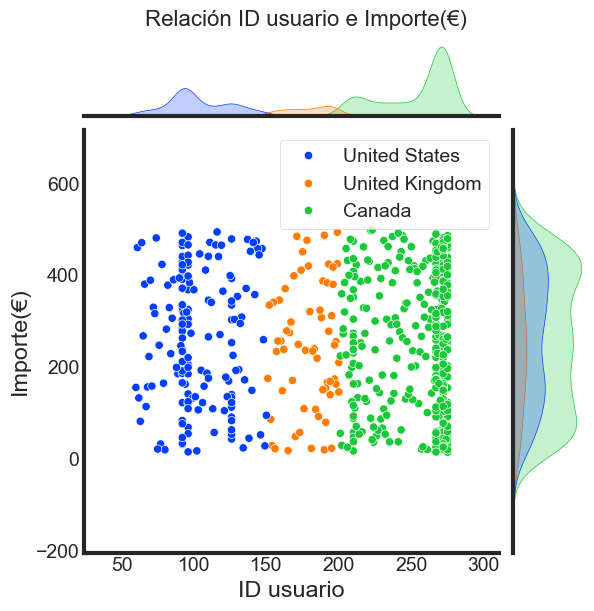

In [13]:
# Queremos analizar la relación entre id_usuario y amount, pero también colorear según el país de usuario
# Seleccionamos los DataFrames necesarios
transactions = df['transactions']
users_all = df['users_all']

# Unimos los DataFrames
transact_users = pd.merge(transactions, users_all, left_on='user_id', right_on='id')

# Definimos el tamaño del lienzo, la paleta de colores y el estilo
plt.figure(figsize=(12, 10))
palette = sns.color_palette("bright")
sns.set_style('ticks')

# Creamos el gráfico y colocamos etiquetas a los ejes
grafico = sns.jointplot(x='user_id', y='amount', data=transact_users, hue='country', palette= palette)
plt.xlabel('ID usuario')
plt.ylabel('Importe(€)')

# Reubicamos la leyenda
grafico.ax_joint.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Movemos el título a la parte superior y fuera del gráfico
plt.suptitle('Relación ID usuario e Importe(€)', y=1.02, fontsize=16)

plt.show()

**Interpretación:** 
*No se observa una relación clara entre el ID de usuario y el Importe, ya que todos ellos parecen realizar compras de distintos montos, pero sí observamos ciertas concentraciones de puntos que comentaremos luego.
Los importes van aproximadamente entre 0 y 500€. Y el id de usuario se distribuye entre 60 y 275.
Podemos ver que los usuarios con el id más alto (entre 200 y 275), los de Canadá (color verde), son los que han realizado mayor cantidad de transacciones.
A su vez, la mayor concentración de puntos dentro del gráfico de dispersión de Canadá ocurre entre los IDs que van del 250 al 275. 
Aquí es donde se concentra la mayor cantidad de transacciones, por eso vemos que la distribución que se muestra en el gráfico de densidad verde en la esquina superior derecha del joinplot se concentra hacia la derecha.
Esta mayor cantidad de transacciones puede deberse, como ya hemos visto con el pairplot, simplemente a que hubo mayor proporción de transacciones declinadas entre estos usuarios y han tenido que realizar nuevamente la transacción.
Por otro lado, vemos que los usuarios con ID entre 150 y 200, del Reino Unido (color naranja), son los que han hecho menor cantidad de transacciones, pero estas tienen una distribución bastante uniforme entre todos los usuarios de ese país.
Por último, los usuarios con ID entre 60 y 150 son los de EEUU (color azul), entre ellos también podemos ver una concentración de los puntos en el diagrama de dispersión y también en el gráfico de densidad azul de la esquina superior izquierda.
La principal concentración de puntos se da cerca del ID de usuario 100 y otra concentración menor ocurre cerca del ID 120. Lo que indicaría que hay 3 o 4 principales compradores dentro de los usuarios de este país.*



# Nivel 3
## Ejercicio 1: Implementa un Violinplot combinado con otro tipo de gráfico

Un Violinplot es similar a un diagrama de caja y bigotes, pero incorpora también al análisis la distribución de los datos después de agruparlos por una o más variables. 
Para continuar con el análisis del gráfico anterior, escogemos la variable amount y la agruparemos según países de los usuarios, distinguiremos los colores según declined.
Y al lado, nos enfocaremos sólo en las transacciones declinadas y mostraremos la relación entre amount e id de usuarios en un gráfico de dispersión.

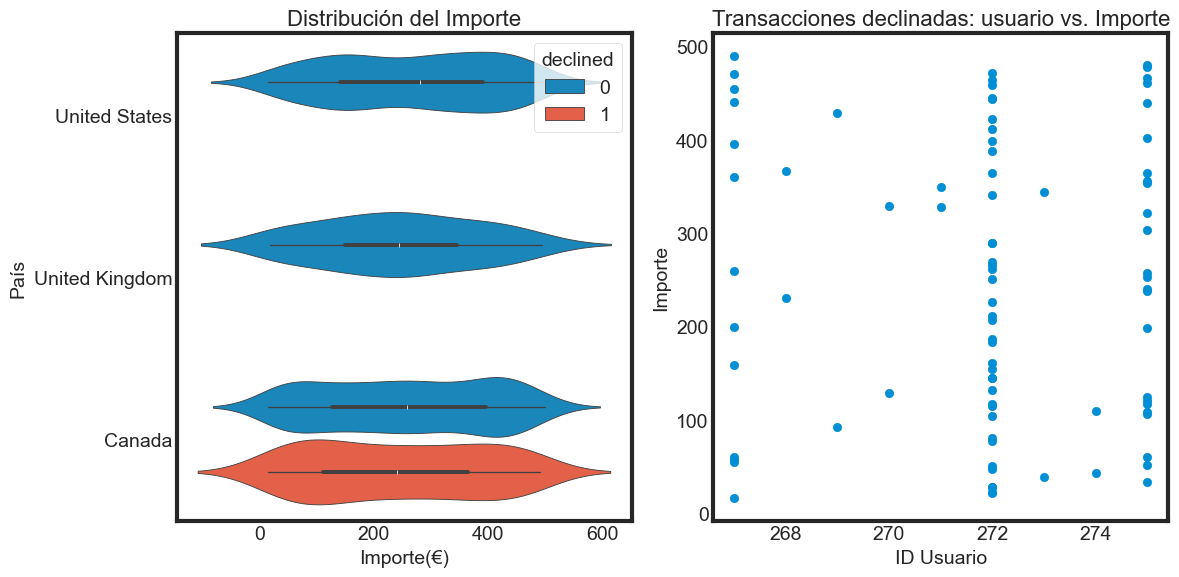

In [14]:
# Creamos el lienzo para colocar los dos gráficos con una fila y dos columnas
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

# Nombramos ax1 y ax2 a cada uno de los gráficos para que sea más fácil trabajar con sus títulos y ejes
# Primer gráfico: violinplot
ax1 = sns.violinplot(x='amount', 
               y='country', 
               hue='declined', 
               data= transact_users, 
               ax=axs[0]) 

# Cambiamos el nombre de los ejes y añadimos título al primer gráfico
ax1.set_xlabel("Importe(€)", fontsize=14)
ax1.set_ylabel("País", fontsize=14)
ax1.set_title('Distribución del Importe', fontsize=16)

# Para el segundo gráfico filtraremos el df sólo por las transacciones declinadas para ver la relación entre user_id y amount en un gráfico de dispersión
transacciones_declinadas = transact_users[transact_users['declined'] == 1]

# Segundo gráfico: gráfico de dispersión
ax2 = axs[1].scatter(x=transacciones_declinadas['user_id'], #el eje al usar matplot se pasa antes! no como parámetro como en seaborn
                     y=transacciones_declinadas['amount'])

# Cambiamos el nombre de los ejes y añadimos el título para el segundo gráfico
axs[1].set_xlabel('ID Usuario', fontsize=14)
axs[1].set_ylabel('Importe', fontsize=14)
axs[1].set_title('Transacciones declinadas: usuario vs. Importe', fontsize=16)

fig.tight_layout() #Ajusta automáticamente los parámetros para que se ajusten dentro de la figura

plt.show()

**Interpretación:** *El gráfico violinplot (gráfico 1, de la izquierda) enseña como se distribuye el importe de las transacciones por país de usuario y tambíen por estado(aceptada/rechazada). Vemos que este importe oscila entre 0€ y 500€ y que la mediana de casi todos los países es cercana a 200€, siendo comparativamente un poco mayor la de EEUU. El único país que tiene usuarios con transacciones declinadas es Canadá, ya que es el único con un violinplot azul. Sus transacciones declinadas se concentran en dos montos, en mayor medida hay más transacciones rechazadas cercanas a un importe de 100€ y en segundo lugar se encuentran concentradas las transacciones rechazadas de un importe cercano a 400€, por esta razón la curvatura del violín es más marcada en estos dos sectores. El Reino Unido concentra el importe de la mayoría de sus transacciones muy cercano a la mediana, es decir no muestra tanta dispersión como Canadá o EEUU. Por su parte, EEUU concentra los importes más que nada en el último cuartil, siendo importes más altos, lo que podría explicar su mayor mediana con respecto al resto. 
En el gráfico de dispersión (gráfico 2, de la derecha) podemos enfocarnos en los usuarios y los importes de las transacciones que han sido declinadas, (que por el gráfico anterior ya sabemos que son sólo los usuarios de Canadá). La mayoría de las transacciones declinadas/rechazadas se dan en 3 usuarios de ID 267, 272 Y 275. Para mejorar la experiencia del usuario y disminuir el número de transacciones rechazadas en un futuro, se podría recomendar enviar una encuensta o un email para indagar el motivo de los errores y así aplicar acciones de mejora, también se podría ofrecer un descuento al usuario para futuras compras.*

## Ejercicio 2: Genera un FacetGrid para visualizar múltiples aspectos de los datos simultáneamente.

Un FacetGrid es una visualización de Seaborn que permite trazar una serie de gráficos pequeños (facetas) para diferentes niveles de una variable categórica. Analizaremos las variables amount, declined y país de las compañias (como categoría) para continuar indagando sobre las transacciones declinadas.

<Figure size 1200x1000 with 0 Axes>

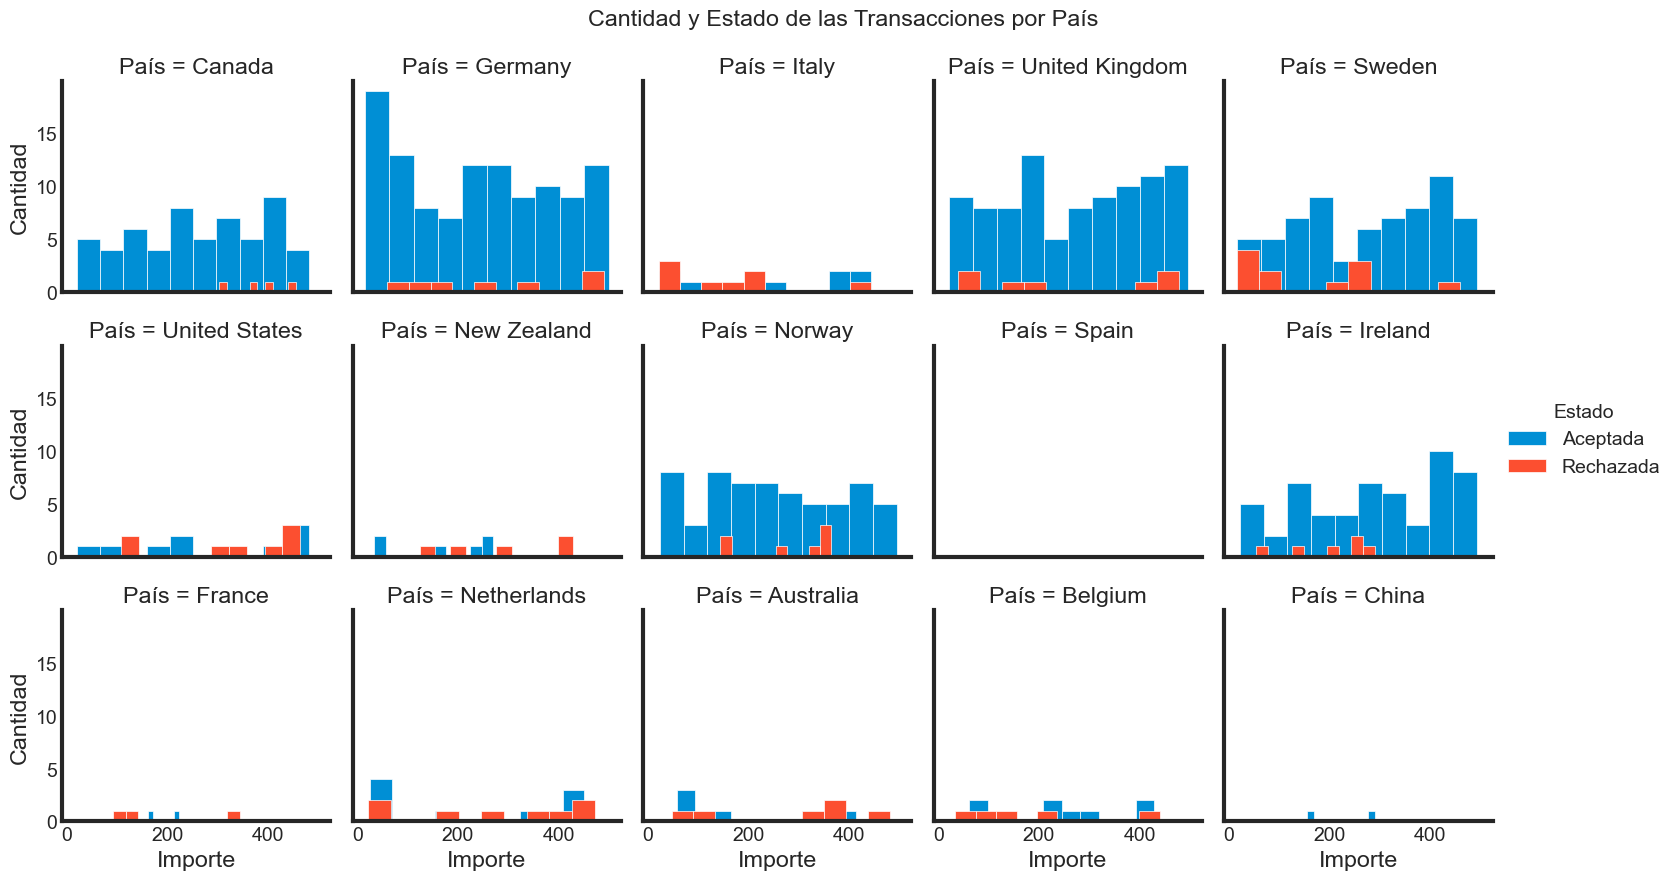

In [25]:
# Ya tenemos las librerías importadas
# Definimos los df nuevamente
transactions = df['transactions']
companies = df['companies']

# Unimos los DataFrames
transac_companies = pd.merge(transactions, companies, left_on ='business_id', right_on='company_id')

# Cambiamos los nombres de las columnas para que en el gráfico aparezcan en castellano
transac_companies = transac_companies.rename(columns={'amount': 'Importe', 'country': 'País', 'declined':'Estado'})

# Y reemplazamos los valores de la columna 'Declinada' para que la leyenda sea más fácil de comprender
transac_companies['Estado'] = transac_companies['Estado'].replace({0: 'Aceptada', 1: 'Rechazada'})

# Seleccionamos los campos que queremos analizar
datos_seleccionados = transac_companies[['Importe', 'Estado', 'País']]

# Graficamos
plt.figure(figsize=(12, 10)) 
g = sns.FacetGrid(datos_seleccionados, col='País', col_wrap = 5, hue= 'Estado')
g.map(plt.hist, 'Importe')

# Añadimos la leyenda
g.add_legend()
g.set_ylabels('Cantidad')

#Colocamos título
plt.subplots_adjust(top=0.9)  # Ajusta el espacio superior para dar espacio al título
g.fig.suptitle('Cantidad y Estado de las Transacciones por País') #suptitle coloca el título en la parte de arriba

plt.show()

**Interpretación:** *En este gráfico podemos observar la distribución de la variable Importes de las transacciones según su Estado (Aceptada en celeste, Rechazada en Rojo). Cada uno de los gráficos representa uno de los países donde se ubican las empresas que realizan las transacciones. Claramente podemos corroborar lo que ya hemos visto en el gráfico de pastel del ejercicio 4: Alemania, Reino Unido y Suecia son los tres países que más volumen de transacciones han realizado; mientras que China, España y Francia son los que menos. Por otro lado, corroboramos lo visto en el ejercicio 5: Italia, EEUU, Nueva Zelanda, Francia, Países Bajos y Australia tienen gran proporción de sus transacciones rechazadas. Podría recomendarse contactar con las empresas de estos países para consultar y obtener un feedback sobre las transacciones rechazadas y aprovechar para informarles sobre los usuarios encontrados en el análisis del gráfico anterior que concentran gran número de estos rechazos.*